In [1]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.transforms import RandomRotation, RandomHorizontalFlip, RandomVerticalFlip
import cv2
import numpy as np
from torchvision.transforms import functional as F

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose([
    RandomRotation(degrees=15),
    RandomHorizontalFlip(),
    RandomVerticalFlip(),
    transforms.ToTensor()
])

In [4]:
full_data = datasets.ImageFolder('final_image_', transform=transform)

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
train_size = int(0.8 * len(full_data))
test_size = len(full_data) - train_size

train_data, test_data = torch.utils.data.random_split(full_data, [train_size, test_size], generator=torch.Generator().manual_seed(42))
# Kích thước batch cho DataLoader
batch_size = 16

# DataLoader cho tập huấn luyện
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# DataLoader cho tập kiểm thử
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
# Sử dụng full_data để lấy số lớp
num_classes = len(full_data.classes)

In [5]:
model = models.resnet18(pretrained=True)

C:\Users\khang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\khang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:

model.fc = nn.Linear(model.fc.in_features, num_classes)

In [7]:
model.train()

# Chuyển mô hình sang thiết bị đã chọn
model = model.to(device)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [9]:
num_epochs = 30

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")



Epoch 1/30, Loss: 5.862392902374268
Epoch 2/30, Loss: 5.62940788269043
Epoch 3/30, Loss: 5.284804344177246
Epoch 4/30, Loss: 5.09000825881958
Epoch 5/30, Loss: 4.741026878356934
Epoch 6/30, Loss: 5.006388187408447
Epoch 7/30, Loss: 3.596548080444336
Epoch 8/30, Loss: 3.6013269424438477
Epoch 9/30, Loss: 3.257166862487793
Epoch 10/30, Loss: 3.2902278900146484
Epoch 11/30, Loss: 3.061940908432007
Epoch 12/30, Loss: 2.4539942741394043
Epoch 13/30, Loss: 3.2266414165496826
Epoch 14/30, Loss: 2.1823763847351074
Epoch 15/30, Loss: 1.0993390083312988
Epoch 16/30, Loss: 1.0533106327056885
Epoch 17/30, Loss: 1.1209958791732788
Epoch 18/30, Loss: 0.7372565865516663
Epoch 19/30, Loss: 0.5497615933418274
Epoch 20/30, Loss: 0.7162706851959229
Epoch 21/30, Loss: 0.6247117519378662
Epoch 22/30, Loss: 0.4118223488330841
Epoch 23/30, Loss: 0.306814044713974
Epoch 24/30, Loss: 0.11563288420438766
Epoch 25/30, Loss: 0.15393878519535065
Epoch 26/30, Loss: 0.11133649945259094
Epoch 27/30, Loss: 0.091035030

In [10]:
# Đánh giá mô hình trên tập kiểm thử
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 91.86%


In [11]:

torch.save(model.state_dict(), 'tranferlearnig_resnet18.pth')

In [12]:
import matplotlib.pyplot as plt

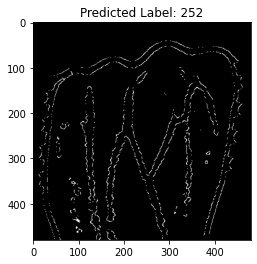

In [21]:
def predict_image(model, image1, transform):
    # Áp dụng các biến đổi để chuẩn bị cho mô hình
    # img = transform(image)
    image1 = image1.unsqueeze(0)  # Thêm chiều batch

    # Chuyển ảnh lên GPU nếu có
    image1 = image1.to(device)

    # Đặt mô hình vào chế độ đánh giá
    model.eval()

    # Dự đoán
    with torch.no_grad():
        output = model(image1)

    # Lấy nhãn dự đoán
    _, predicted = torch.max(output, 1)
    predicted_class = predicted.item()

    # Hiển thị ảnh và nhãn dự đoán
    image1 = transforms.ToPILImage()(image1.squeeze(0).cpu())
    plt.imshow(image1)
    plt.title(f"Predicted Label: {predicted_class}")
    plt.show()

# DataLoader cho tập kiểm thử với batch size là 1
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

# Lấy ảnh từ tập kiểm thử
test_image, true_label = next(iter(test_loader))

# Gọi hàm dự đoán
predict_image(model, test_image[0], transform)